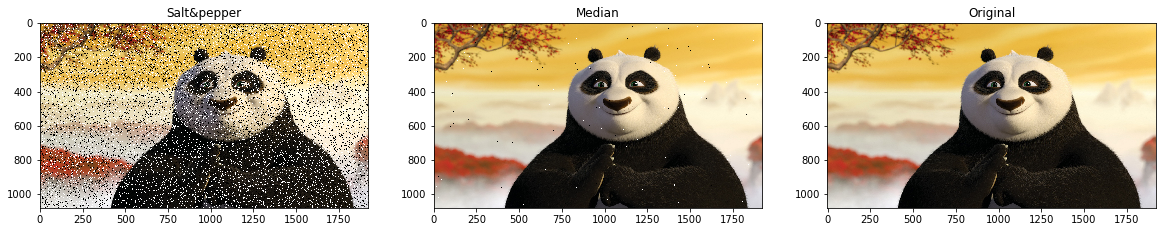

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import matplotlib.image as pltimg
from skimage import io

def salt_n_pepper(img, pad = 10, show = 1):
    img = to_std_float(img)
    noise = np.random.randint(pad, size = (img.shape[0], img.shape[1], 1))
    img = np.where(noise == 0, 0, img)
    img = np.where(noise == (pad-1), 1, img)
     
    img = to_std_uint8(img)
     
    return img

def to_std_float(img):
    img.astype(np.float16, copy = False)
    img = np.multiply(img, (1/255))
     
    return img

def to_std_uint8(img):
    img = cv2.convertScaleAbs(img, alpha = (255/1))
     
    return img
        
im = pltimg.imread('panda.jpg')
newImg = salt_n_pepper(im)

filteredImg = cv2.medianBlur(newImg,3)

fig = plt.figure(figsize=(20,15))
plt.subplot(131)
plt.title("Salt&pepper")
plt.imshow(newImg)
plt.subplot(132)
plt.title("Median")
plt.imshow(filteredImg)
plt.subplot(133)
plt.title("Original")
plt.imshow(im)
plt.show()